# Iranian Vehicle Classification using CNN and PyTorch 🚗🇮🇷 (Tanaan)
## This project classifies Iranian vehicles using a custom CNN built with PyTorch. It covers data preparation, augmentation,training, evaluation, and deployment.

## Import & Setup

In [1]:
import pandas as pd
import random
import os
from PIL import Image
import shutil
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision

from torchvision import transforms,datasets,models
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

#import torchmetrics for Loss and Accyracy libraries and Visualizing
import torchmetrics
from torchmetrics import Accuracy
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


from tqdm.auto import tqdm

# setup Device to CUDA

In [2]:
# setup Device to CUDA
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Data Augmentation with Albumentations
* ## The following function takes all images from the input directory and generates multiple augmented version using Albumentations.
* ## chose how many augmented images per original image you'd like to generate.

In [5]:
import os 
import cv2 
import albumentations as A 
from tqdm import tqdm 


def augment_and_save(input_dir, output_dir, augmentations_per_image=30): 
    transform = A.Compose([ A.RandomBrightnessContrast(brightness_limit=0.1,contrast_limit=0.1,p=0.3), 
                           A.Rotate(limit=20, p=0.5), 
                           #A.HorizontalFlip(p=0.5), 
                           A.GaussianBlur(blur_limit=3,p=0.1), 
                           A.RandomShadow(shadow_roi=(0,0.3,1,1),num_shadows_lower=1,num_shadows_upper=1,p=0.05), 
                           A.RandomRain(p=0.02), 
                           A.RandomFog(fog_coef_lower=0.05,fog_coef_upper=0.1,p=0.02), 
                           A.ShiftScaleRotate(shift_limit=0.03, scale_limit=0.05, rotate_limit=3, p=0.3), 
                           A.Perspective(scale=(0.02, 0.05), p=0.2) ]) 
    os.makedirs(output_dir, exist_ok=True) 
    image_files = os.listdir(input_dir) 
    for image_file in tqdm(image_files): 
        image_path = os.path.join(input_dir, image_file) 
        image = cv2.imread(image_path) 
        for i in range(augmentations_per_image): 
            augmented = transform(image=image) 
            aug_img = augmented["image"] 
            output_path = os.path.join(output_dir, f"{image_file.split('.')[0]}_aug_{i}.jpg") 
            cv2.imwrite(output_path, aug_img)  


augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/206", "dataset/206", augmentations_per_image=21) 
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/207", "dataset/207", augmentations_per_image=23)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/405", "dataset/405", augmentations_per_image=13)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/samand", "dataset/samand", augmentations_per_image=15)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Naisan", "dataset/Naisan", augmentations_per_image=16)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Pars","dataset/Pars", augmentations_per_image=13)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Pride", "dataset/Pride", augmentations_per_image=13)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Pride_vanet","dataset/Pride_vanet", augmentations_per_image=16)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Saina","dataset/Saina",augmentations_per_image=21)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Quiek","dataset/Quiek",augmentations_per_image=17)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/L90","dataset/L90",augmentations_per_image=14)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Dena","dataset/Dena",augmentations_per_image=12)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Tiba","dataset/Tiba",augmentations_per_image=20)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Paykan-Vanet","dataset/Paykan-Vanet",augmentations_per_image=21)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Mazda-vanet","dataset/Mazda-vanet",augmentations_per_image=15)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Truck-Benz","dataset/Truck-Benz",augmentations_per_image=31)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Truck-Renault","dataset/Truck-Renault",augmentations_per_image=27)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Unknown","dataset/Unknown",augmentations_per_image=10)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Volvo-FH-FM","dataset/Volvo-FH-FM",augmentations_per_image=28)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Volvo-N10","dataset/Volvo-N10",augmentations_per_image=42)
augment_and_save("/kaggle/input/iranian-car-imageclassification/iranian-car-final/Volvo-NH","dataset/Volvo-NH",augmentations_per_image=44)




/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/tmp/ipykernel_35/2662881293.py:10: UserWarning: Argument(s) 'num_shadows_lower, num_shadows_upper' are not valid for transform RandomShadow
  A.RandomShadow(shadow_roi=(0,0.3,1,1),num_shadows_lower=1,num_shadows_upper=1,p=0.05),
/tmp/ipykernel_35/2662881293.py:12: UserWarning: Argument(s) 'fog_coef_lower, fog_coef_upper' are not valid for transform RandomFog
  A.RandomFog(fog_coef_lower=0.05,fog_coef_upper=0.1,p=0.02),
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
100%|██████████| 20/20 [00:1

# Image Transformations:
* ## Resize
* ## Normalization
* ## Convert image to Tensor
* ## Organize Dataset with `torchvision.datasets.folder.ImageFolder`

In [9]:
transform=transforms.Compose([transforms.Resize((224,224)),
                             transforms.ToTensor(),
                             transforms.Normalize((.5),(.5))])


dataset=datasets.ImageFolder(root="/kaggle/working/dataset",
                                    transform=transform)

#dataloader=torch.utils.data.DataLoader(dataset,batch_size=8,shuffle=True)


In [10]:
dataset

Dataset ImageFolder
    Number of datapoints: 17575
    Root location: /kaggle/working/dataset
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [11]:
#dataset.classes,
dataset.class_to_idx
#dataset.targets
#dataset.imgs

{'206': 0,
 '207': 1,
 '405': 2,
 'Dena': 3,
 'L90': 4,
 'Mazda-vanet': 5,
 'Naisan': 6,
 'Pars': 7,
 'Paykan-Vanet': 8,
 'Pride': 9,
 'Pride_vanet': 10,
 'Quiek': 11,
 'Saina': 12,
 'Tiba': 13,
 'Truck-Benz': 14,
 'Truck-Renault': 15,
 'Unknown': 16,
 'Volvo-FH-FM': 17,
 'Volvo-N10': 18,
 'Volvo-NH': 19,
 'samand': 20}

In [12]:
indices=list(range(len(dataset)))
#train_indices,test_indices=train_test_split(indices,test_size=0.2,stratify=[label for _,label in dataset])
labels=dataset.targets

train_idx,test_idx=train_test_split(indices,test_size=0.2,stratify=labels)

train_data=Subset(dataset,train_idx)
test_data=Subset(dataset,test_idx)

train_dataloader=DataLoader(train_data,batch_size=8,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=8,shuffle=False)


In [14]:
image,lable=next(iter(train_dataloader))
print(f'train data: {image.shape}')

image,lable=next(iter(test_dataloader))
print(f'test data: {image.shape}')


train data: torch.Size([8, 3, 224, 224])
test data: torch.Size([8, 3, 224, 224])


In [13]:
def create_dataframe_train (data,dataset_name=str):
    len_data=len(data.dataset)
    num_classes=len(dataset.classes)
    #class_name=dataloader.dataset.classes
    eg_image,label=next(iter(data))
    image_shape=eg_image.shape
    batch=len(data)
    label_shape=label.shape
    image_type=eg_image.dtype
    data={'Dataset Name':[dataset_name],
          'Number of images':[len_data],
          'Number of Batch':[batch],
          'Number of classes':[num_classes],
          
          'Label shape':[label_shape],
          'Type of images':[image_type],
          'Image shape [N,C,H,W]':[[image_shape]]}
    df=pd.DataFrame(data)
    return df


train_df=create_dataframe_train(train_dataloader,'Train')
test_df=create_dataframe_train(test_dataloader,'Test')


combined_df=pd.concat([train_df,test_df])
combined_df

,Dataset Name,Number of images,Number of Batch,Number of classes,Label shape,Type of images,"Image shape [N,C,H,W]"
0,Train,14060,1758,21,"(8,)",torch.float32,"[(8, 3, 224, 224)]"
0,Test,3515,440,21,"(8,)",torch.float32,"[(8, 3, 224, 224)]"


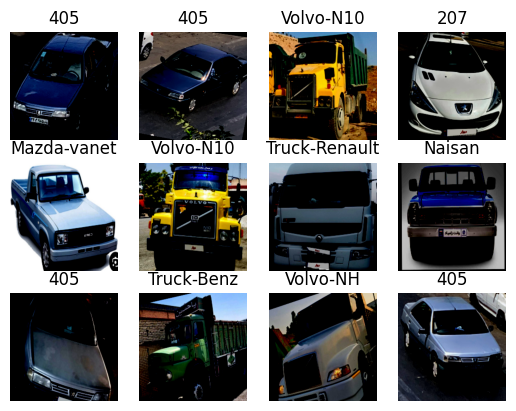

In [15]:
#random.seed(42)
test_images_labels=[]

random_inx=random.sample(range(len(test_dataloader)), k=12)  
random_samples=[test_dataloader.dataset[i] for i in random_inx ]
for img,label in random_samples:
    test_images_labels.append((img,label))
   

for inx,(img,label) in enumerate(test_images_labels):

    img=img.permute(1,2,0) # [c,h,w] to [h,w,c]
    plt.subplot(3,4,inx+1)
    plt.imshow(img,cmap='gray')
    plt.axis(False)
    #title_text=dataloader.dataset.classes[label]
    title_text=dataset.classes[label]
    plt.title(title_text)

In [16]:
class CustomBlock(nn.Module): 
    def __init__(self, in_channels, out_channels, stride=1): 
        super(CustomBlock, self).__init__() 
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1) 
        self.bn1 = nn.BatchNorm2d(out_channels) 
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1) 
        self.bn2 = nn.BatchNorm2d(out_channels) 
        self.conv3 = nn.Conv2d(out_channels, out_channels , kernel_size=1) 
        self.bn3 = nn.BatchNorm2d(out_channels) 
        self.relu = nn.ReLU()
        self.identity_conv=nn.Conv2d(in_channels,out_channels,kernel_size=1, stride=stride, padding=1)
    def forward(self, x):
        identity = x
        #print(identity.shape)
        x = self.conv1(x) 
        x = self.bn1(x) 
        x = self.relu(x) 
        x = self.conv2(x) 
        x = self.bn2(x) 
        x = self.relu(x) 
        x = self.conv3(x) 
        x = self.bn3(x) 
        #print(x.shape)
        if self.identity_conv is not None: 
            identity = self.identity_conv(identity) 
        if x.shape != identity.shape:
            identity=nn.functional.interpolate(identity,size=(x.shape[2],x.shape[3]),mode='nearest')
            
        x += identity 
        x = self.relu(x) 
        return x 
            
            
class SimpleResNet(nn.Module): 
    def __init__(self, num_classes=13): 
        super(SimpleResNet, self).__init__() 
        self.conv1 = nn.Conv2d(3,16, kernel_size=3, stride=1, padding=1) 
        self.bn1 = nn.BatchNorm2d(16) 
        self.relu = nn.ReLU() 
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=1, padding=1) 
        self.block1 = CustomBlock(16, 32)
        self.block2 = CustomBlock(32,64) 
        self.block3 = CustomBlock(64,128)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1)) 
        self.flatten=nn.Flatten()
        self.fc = nn.Linear(128 ,128)
        self.fc2=nn.Linear(128,256)
        self.drop=nn.Dropout(p=0.5)
        self.fc3=nn.Linear(256,num_classes)
        
        
    def forward(self, x): 
        x = self.conv1(x) 
        
        x = self.bn1(x) 
        x = self.relu(x) 
        x = self.maxpool(x)
        x = self.block1(x) 
        x = self.block2(x) 
        x = self.block3(x) 
        x = self.avgpool(x) 
        x = self.flatten(x) 
        x = self.fc(x)
        x=self.fc2(x)
        x=self.drop(x)
        x=self.fc3(x)
        return x




#model =SimpleResNet(num_classes=13).to(device)
model =SimpleResNet(num_classes=21).to(device)

print(model)

SimpleResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=1, padding=1, dilation=1, ceil_mode=False)
  (block1): CustomBlock(
    (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (identity_conv): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1))
  )
  (block2): CustomBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1),

In [17]:
loss_fn=nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=0.1,patience=5,verbose=True)
accuracy=Accuracy(task='multiclass',num_classes=len(dataset.classes)).to(device)

In [18]:
def train_loop(model=nn.Module,
               data=torch.utils.data.DataLoader,
               loss_fn=nn.Module,
               optimizer=torch.optim.Optimizer,
               scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau,
               accuracy_fn=torchmetrics,
               device=torch.device):
    torch.cuda.manual_seed(42)
    start_time_train=timer()
    train_acc,train_loss=0,0
    model.train()
    for image,label in data:
        image,label=image.to(device),label.to(device)
        y_pred_prob=model(image)
        loss=loss_fn(y_pred_prob,label)
        train_loss+=loss
        train_acc+=accuracy_fn(label,torch.argmax(y_pred_prob,dim=1))
        #train_acc+=acc


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    scheduler.step(train_loss)
    

    train_acc/=len(data)
    train_loss/=len(data)

    end_time_train=timer()
    current_lr=scheduler.optimizer.param_groups[0]['lr']


    print(f"\033[92m Learinig rate:{current_lr:.6f}\nTrain_loss:{train_loss:.4f}%\n Train_acc:{train_acc:.4f}%\nDevice is on {device}\nTime passed for training:{end_time_train-start_time_train:.2f}s\033[0m")

    return train_acc,train_loss


def test_loop(model=nn.Module,
               data=torch.utils.data.DataLoader,
               loss_fn=nn.Module,
               accuracy_fn=torchmetrics,
               scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau,
               device=torch.device):
    torch.cuda.manual_seed(42)
    start_time_test=timer()
    test_acc,test_loss=0,0
    model.eval().to(device)
    with torch.inference_mode():
        for image,label in data:
            image,label=image.to(device),label.to(device)
            y_pred_prob=model(image)
            loss=loss_fn(y_pred_prob,label)
            test_loss+=loss
            acc=accuracy_fn(label,y_pred_prob.argmax(dim=1))
            test_acc+=acc
            

        test_acc/=len(data)
        test_loss/=len(data)
        
        end_time_test=timer()


        print(f"\033[94mTest_loss:{test_loss:.4f}%\n Test_acc:{test_acc:.4f}%\nDevice is on {device}\nTime passed for testing:{end_time_test-start_time_test:.2f}s\033[0m")
        scheduler.step(test_loss)
        current_lr=scheduler.optimizer.param_groups[0]['lr']
        print(f'\033[94m Learning Rate after scheduler step:{current_lr:.6f}')

        return test_acc,test_loss

In [36]:
torch.cuda.manual_seed(42)
epochs=5
train_accuracies=[]
train_losses=[]
test_accuracies=[]
test_losses=[]
time_start = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}/{epochs}")
    train_acc,train_loss=train_loop(model,train_dataloader,loss_fn,optimizer, scheduler,accuracy,device=str(next(model.parameters()).device))
    test_acc,test_loss=test_loop(model,test_dataloader,loss_fn,accuracy, scheduler,device=str(next(model.parameters()).device))

    train_losses.append(train_loss.item())
    train_accuracies.append(train_acc.item())
    test_losses.append(test_loss.item())
    test_accuracies.append(test_acc.item())
    print(f"------------------------")
time_end=timer()
print(f'Total time passed :\033[91m{time_end-time_start:.4f}s\033[0m')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0/5
 Learinig rate:0.000100
Train_loss:0.0570%
 Train_acc:0.9856%
Device is on cuda:0
Time passed for training:270.29s
Test_loss:0.1348%
 Test_acc:0.9787%
Device is on cuda:0
Time passed for testing:60.57s
 Learning Rate after scheduler step:0.000100
------------------------
Epoch 1/5
 Learinig rate:0.000100
Train_loss:0.0589%
 Train_acc:0.9849%
Device is on cuda:0
Time passed for training:270.70s
Test_loss:0.1578%
 Test_acc:0.9793%
Device is on cuda:0
Time passed for testing:61.00s
 Learning Rate after scheduler step:0.000100
------------------------
Epoch 2/5
 Learinig rate:0.000100
Train_loss:0.0621%
 Train_acc:0.9845%
Device is on cuda:0
Time passed for training:271.19s
Test_loss:0.1360%
 Test_acc:0.9773%
Device is on cuda:0
Time passed for testing:60.33s
 Learning Rate after scheduler step:0.000100
------------------------
Epoch 3/5
 Learinig rate:0.000100
Train_loss:0.0593%
 Train_acc:0.9854%
Device is on cuda:0
Time passed for training:270.06s
Test_loss:0.1407%
 Test_acc:0

In [37]:
import plotly.graph_objects as go

epochs=list(range(1,len(train_accuracies)+1))


train=go.Scatter(x=epochs,
                 y=train_accuracies,
                 mode='lines+markers',
                 name='Train Acc',line=dict(color='royalblue'))



test=go.Scatter(x=epochs,
                 y=test_accuracies,
                 mode='lines+markers',
                 name='Test Acc',line=dict(color='orange'))

figure=go.Figure(data=[train,test])
figure.update_layout(title='Train and Test Accuracy per Epoch',
                    xaxis_title='Epochs',
                    yaxis_title='Accuracy',
                    template='plotly_white')

figure.show()

In [38]:
pochs=list(range(1,len(train_losses)+1))


train=go.Scatter(x=epochs,
                 y=train_losses,
                 mode='lines+markers',
                 name='Train Loss',line=dict(color='red'))



test=go.Scatter(x=epochs,
                 y=test_losses,
                 mode='lines+markers',
                 name='Test Loss',line=dict(color='black'))

figure=go.Figure(data=[train,test])
figure.update_layout(title='Train and Test Loss per Epoch',
                    xaxis_title='Epochs',
                    yaxis_title='Loss',
                    template='plotly_white')

In [40]:
#torch.cuda.manual_seed(42)
test_images_labels=[]

random_inx=random.sample(range(len(test_data)), k=9)
random_samples=[test_data[i] for i in random_inx ]
for img,label in random_samples:
    test_images_labels.append((img,label))

model.eval()
with torch.inference_mode():
    for img,label in test_images_labels:
        #print(img.shape)
        img=img.unsqueeze(0).to(device)
        #print(img.shape)
        y_logits=model(img)
        y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
      
        if label==y_pred.item():
            print(f'\033[92m True label:{label}, Predicted label:{y_pred.item()}\033[0m')
        else:
            print(f'\033[91m True label:{label}, Predicted label:{y_pred.item()}\033[0m')

 True label:0, Predicted label:0
 True label:14, Predicted label:14
 True label:3, Predicted label:3
 True label:8, Predicted label:8
 True label:4, Predicted label:4
 True label:8, Predicted label:8
 True label:9, Predicted label:9
 True label:10, Predicted label:10
 True label:3, Predicted label:3


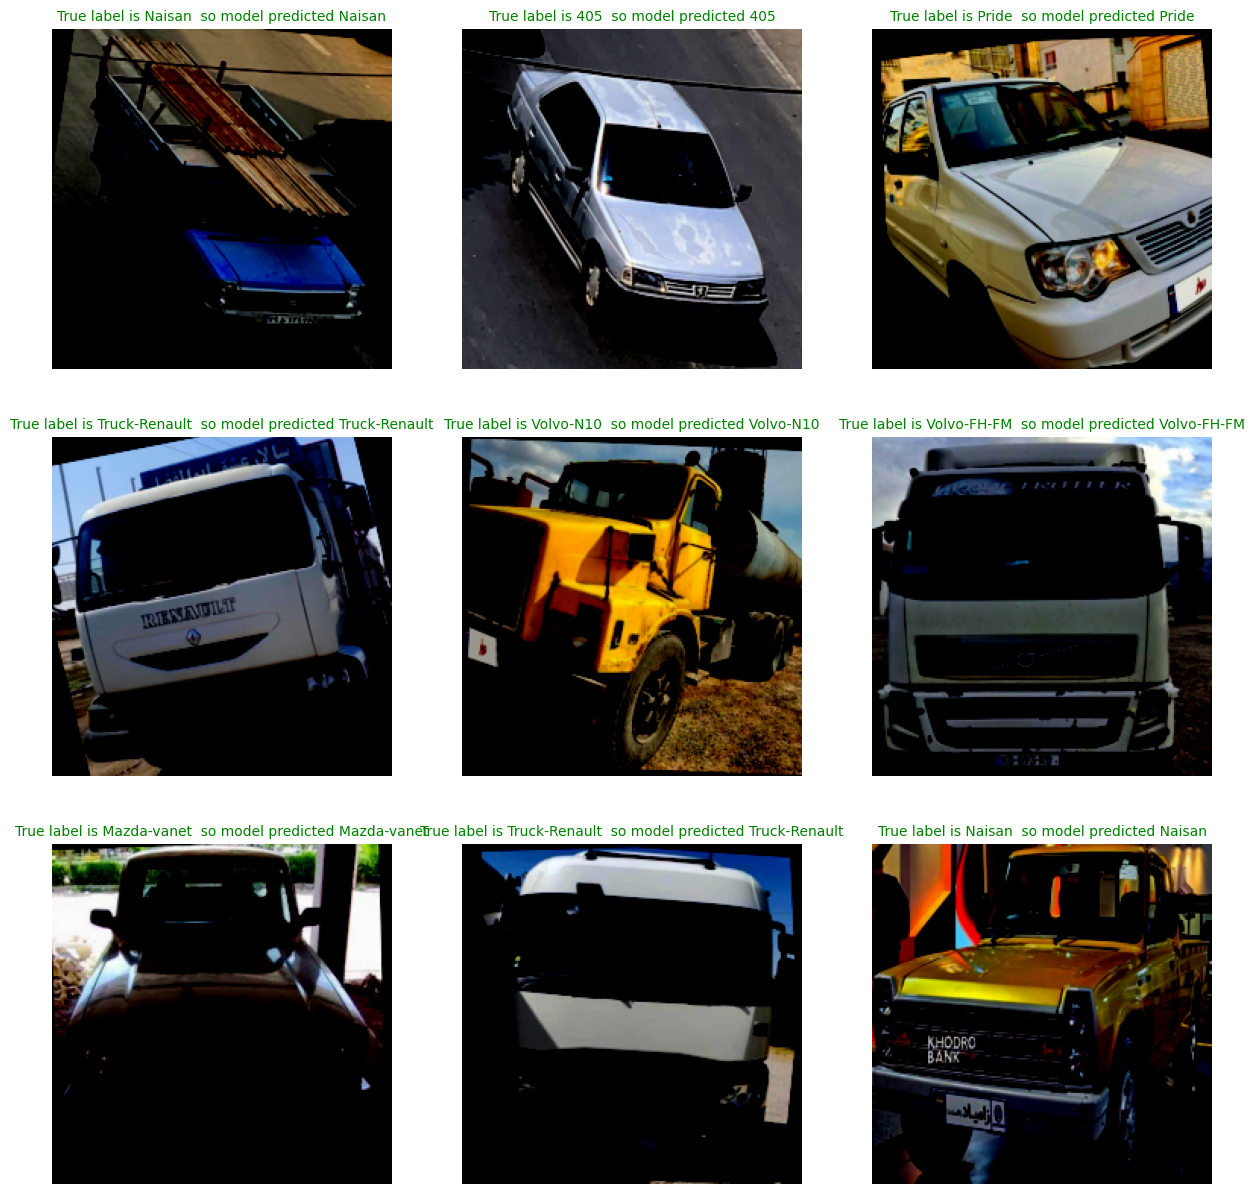

In [59]:
import random
#random.seed(42)
test_images_labels=[]

random_inx=random.sample(range(len(test_data)), k=9)  # or with test_dataloader
random_samples=[test_data[i] for i in random_inx ]
for img,label in random_samples:
    test_images_labels.append((img,label))

y_preds=[]
model.eval()
with torch.inference_mode():
    plt.figure(figsize=(15,15))
    for inx,(img,label) in enumerate(test_images_labels):
        img_model=img.unsqueeze(0).to(device)
        img=img.permute(1,2,0)
        #print(img.shape)
        
        y_logits=model(img_model)
        y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
        y_preds.append(y_pred)
        plt.subplot(3,3,inx+1)
        plt.imshow(img.squeeze(0),cmap='gray')
        plt.axis(False)
        title_true_text=f'True label is {dataset.classes[label]}  so model predicted {dataset.classes[y_pred.item()]}'
        title_false_text=f'True label is {dataset.classes[label]} But model predicted {dataset.classes[y_pred.item()]}'
        if label==y_pred.item():
            plt.title(title_true_text,fontsize=10, c="g")
        else:
            plt.title(title_false_text,fontsize=10, c="r")
y_pred_tensor =torch.cat(y_preds,dim=0)   

# ConfusionMatrix

In [47]:
# 1. Make predictions with trained model
y_preds =[]
torch.cuda.manual_seed(42)
model.eval()
with torch.inference_mode():
  for img,label in test_data:

      image= img.to(device) 
     
    # Do the forward pass
      y_logit = model(image.unsqueeze(0))
    # Turn predictions from logits -> prediction probabilities -> predictions labels
      y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    #y_pred=y_logit.argmax(dim=1)
      # Put predictions on CPU for evaluation(plt)
      y_preds.append(y_pred.cpu())
#print(y_pred.shape)
# Concatenate list of predictions into a tensor
y_pred_tensor =torch.cat(y_preds,dim=0)

In [48]:
tt=[]
for idx in test_idx:
    test=dataset[idx][1]
    tt.append(test)
   

In [49]:
preds=y_pred_tensor.long()
target=torch.tensor(tt).long()

In [50]:
target

tensor([ 5, 17, 20,  ...,  1,  7, 12])

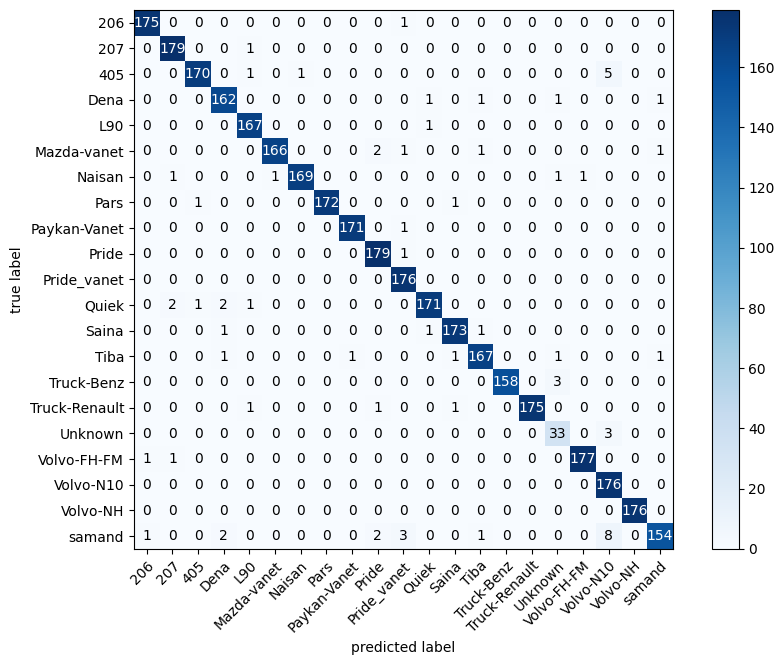

In [52]:
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(dataset.classes), task='multiclass')
confmat_tensor = confmat(preds=preds,
                        target=target)

#3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
                                class_names=dataset.classes,colorbar=True, # turn the row and column labels into class names
                              
                                figsize=(10, 7));

# save and load your own model:

In [4]:
#torch.save(model.state_dict(),'model_with_info_path_final.pt')

#model.load_state_dict(torch.load('model_with_info_path_final.pt',map_location=device))
#model.eval()
#img=cv2.imread('/kaggle/input/test-final/download.jpg')
#img=Image.open('/kaggle/input/test-final/download.jpg').convert("RGB")
#img=transform(img).unsqueeze(0).to(device)



# Model Summary:
* ##  with `torchsummary` and `classification_report`

In [53]:
from torchsummary import summary
summary(model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
       BatchNorm2d-2         [-1, 16, 224, 224]              32
              ReLU-3         [-1, 16, 224, 224]               0
         MaxPool2d-4         [-1, 16, 225, 225]               0
            Conv2d-5         [-1, 32, 225, 225]           4,640
       BatchNorm2d-6         [-1, 32, 225, 225]              64
              ReLU-7         [-1, 32, 225, 225]               0
            Conv2d-8         [-1, 32, 225, 225]           9,248
       BatchNorm2d-9         [-1, 32, 225, 225]              64
             ReLU-10         [-1, 32, 225, 225]               0
           Conv2d-11         [-1, 32, 225, 225]           1,056
      BatchNorm2d-12         [-1, 32, 225, 225]              64
           Conv2d-13         [-1, 32, 227, 227]             544
             ReLU-14         [-1, 32, 2

In [57]:
from sklearn.metrics import classification_report

print(classification_report(target,preds,target_names=dataset.classes))


               precision    recall  f1-score   support

          206       0.99      0.99      0.99       176
          207       0.98      0.99      0.99       180
          405       0.99      0.96      0.97       177
         Dena       0.96      0.98      0.97       166
          L90       0.98      0.99      0.99       168
  Mazda-vanet       0.99      0.97      0.98       171
       Naisan       0.99      0.98      0.99       173
         Pars       1.00      0.99      0.99       174
 Paykan-Vanet       0.99      0.99      0.99       172
        Pride       0.97      0.99      0.98       180
  Pride_vanet       0.96      1.00      0.98       176
        Quiek       0.98      0.97      0.97       177
        Saina       0.98      0.98      0.98       176
         Tiba       0.98      0.97      0.97       172
   Truck-Benz       1.00      0.98      0.99       161
Truck-Renault       1.00      0.98      0.99       178
      Unknown       0.85      0.92      0.88        36
  Volvo-F

# Average inference time(ms) for 100 of test images:

In [58]:
import time
dummy_input=torch.randn(1,3,224,224).to(device)
start=time.time()
for _ in range(100):
    _=model(dummy_input)
    end=time.time()
    print("Average inference time (ms):",(end-start)/100*1000)

Average inference time (ms): 0.037903785705566406
Average inference time (ms): 0.06872415542602539
Average inference time (ms): 0.09609222412109375
Average inference time (ms): 0.12265682220458986
Average inference time (ms): 0.14808893203735352
Average inference time (ms): 0.17220735549926758
Average inference time (ms): 0.19630670547485352
Average inference time (ms): 0.21977663040161133
Average inference time (ms): 0.2427816390991211
Average inference time (ms): 0.26576995849609375
Average inference time (ms): 0.2883434295654297
Average inference time (ms): 0.31100034713745117
Average inference time (ms): 0.3335762023925781
Average inference time (ms): 0.356905460357666
Average inference time (ms): 0.3789401054382324
Average inference time (ms): 0.4010009765625
Average inference time (ms): 0.423433780670166
Average inference time (ms): 0.4458451271057129
Average inference time (ms): 0.46785593032836914
Average inference time (ms): 0.4900503158569336
Average inference time (ms): 0.51

# Many Thanks for watching :)